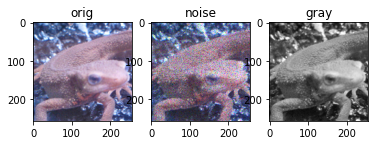

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')
img_noise = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_noise.png')
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)

plt.subplot(1, 3, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 3, 2); plt.imshow(img_noise); plt.title('noise')
plt.subplot(1, 3, 3); plt.imshow(img_gray, cmap='gray'); plt.title('gray')
plt.show()

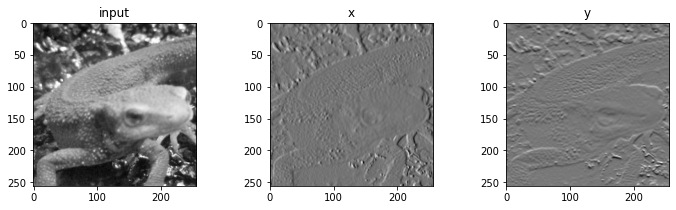

In [7]:
# Q.16. ソーベルフィルタ, Sobel filter
# prewittフィルタの中心部分に重みをつけたフィルタ
# opencv
img_sobel_x = cv2.Sobel(img_gray, cv2.CV_32F, 1, 0, ksize=3)
# normalize
img_sobel_x -= img_sobel_x.min() 
img_sobel_x /= img_sobel_x.max()

img_sobel_y = cv2.Sobel(img_gray, cv2.CV_32F, 0, 1, ksize=3)
# normalize
img_sobel_y -= img_sobel_y.min() 
img_sobel_y /= img_sobel_y.max()

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('x')
plt.imshow(img_sobel_x, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('y')
plt.imshow(img_sobel_y, cmap='gray')
plt.show()

In [13]:
def filter_sobel(img, ksize=(3, 3), mode='x'):
    k = np.zeros(ksize)
    if mode == 'x':
        k[:, 0] = 1
        k[ksize[0]//2, 0] = 2
        k[:, -1] = -1
        k[ksize[0]//2, -1] = -2 
        
    else:
        k[0] = 1
        k[0, ksize[0] //2] = 2
        k[-1]  = -1
        k[-1, ksize[0] // 2]  = -2
    
    out = cv2.filter2D(img.astype(np.float32), -1, k)
    # normalize
    out -= out.min()
    out /= out.max()
    return out
        

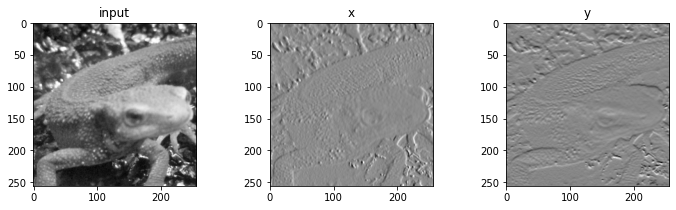

In [14]:
img_sobel_x = filter_sobel(img_gray, mode='x')
img_sobel_y = filter_sobel(img_gray, mode='y')
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('x')
plt.imshow(img_sobel_x, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('y')
plt.imshow(img_sobel_y, cmap='gray')
plt.show();

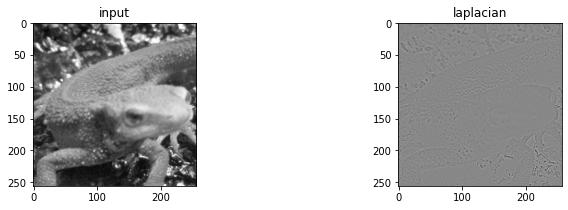

In [17]:
# Q.17. ラプラシアンフィルタ, Laplacian filter
# 証明
# https://algorithm.joho.info/image-processing/laplacian-filter/
# opencv
img_lapl = cv2.Laplacian(img_gray, cv2.CV_32F)
# normalize
img_lapl -= img_lapl.min()
img_lapl /= img_lapl.max()

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('laplacian')
plt.imshow(img_lapl, cmap='gray')
plt.show();

In [20]:
def filter_laplacian(img):
    k = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    out = cv2.filter2D(img.astype(np.float32), -1, k)
    out -= out.min()
    out /= out.max()
    return out
    

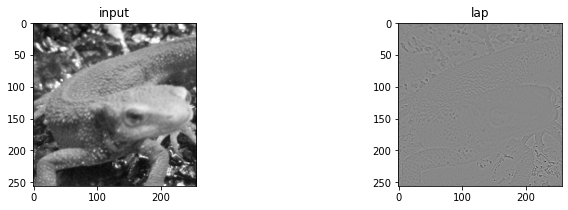

In [22]:
img_lap = filter_laplacian(img_gray)
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('lap')
plt.imshow(img_lap, cmap='gray')
plt.show();

In [26]:
# Q.18. エンボスフィルタ, Emboss filter
# Embossフィルタとは輪郭部分を浮き出しにするフィルタ
def filter_emboss(img):
    k = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
    out = cv2.filter2D(img.astype(np.float32), -1, k)
    out -= out.min()
    out /= out.max()
    return out

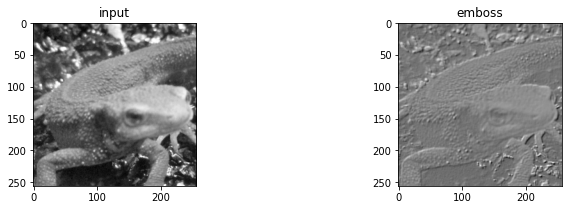

In [27]:
img_emb = filter_emboss(img_gray)
plt.figure(figsize=(12, 3))
plt.subplot(1,2, 1)
plt.title('input')
plt.imshow(img_gray,cmap='gray')
plt.subplot(1, 2, 2)
plt.title('emboss')
plt.imshow(img_emb,cmap='gray')
plt.show();

In [40]:
# Q.19. LoGフィルタ, LoG filter
def filter_LoG(img, ksize=(3, 3), sigma=1.2):
    # kernel
    k = np.zeros(ksize, dtype =np.float32)
    pad_x = ksize[1] // 2
    pad_y = ksize[0] // 2
    
    # filterの中心から遠いほど、重みが大きいようにループを回す
    for y in range(-pad_y, -pad_y + ksize[0]):
        for x in range(-pad_x, -pad_x + ksize[1]):
            k[y + pad_y, x + pad_x] = (x ** 2 + y ** 2 - 2 * (sigma ** 2))  * np.exp(-(x ** 2 + y ** 2) / (2 * sigma **2))
    
    k /= (2 * np.pi * (sigma ** 6))
    k /= k.sum()
    
    out = cv2.filter2D(img.astype(np.float32), -1, k)
    out -= out.min()
    out /= out.max()
    return out
    
    

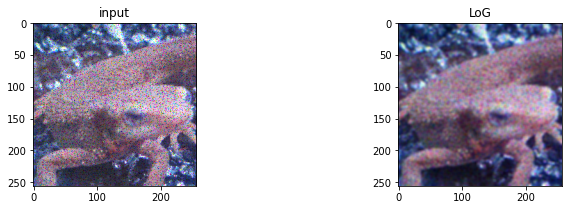

In [41]:
img_log = filter_LoG(img_noise, ksize=(5, 5), sigma=3)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_noise)
plt.subplot(1, 2, 2)
plt.title('LoG')
plt.imshow(img_log)
plt.show();

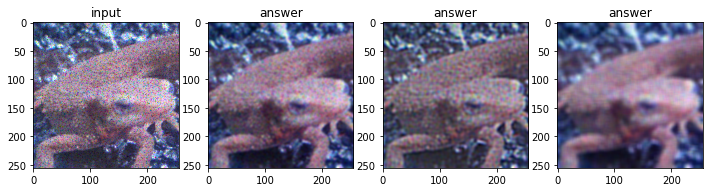

In [45]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1); plt.title('input'); plt.imshow(img_noise)

img_log = filter_LoG(img_noise, ksize=(5, 5), sigma=3)
plt.subplot(1, 4, 2); plt.title('answer'); plt.imshow(img_log)

img_log = filter_LoG(img_noise, ksize=(12, 12), sigma=3)
plt.subplot(1, 4, 3); plt.title('answer'); plt.imshow(img_log)

img_log = filter_LoG(img_noise, ksize=(9, 9), sigma=9)
plt.subplot(1, 4, 4); plt.title('answer'); plt.imshow(img_log)
plt.show()


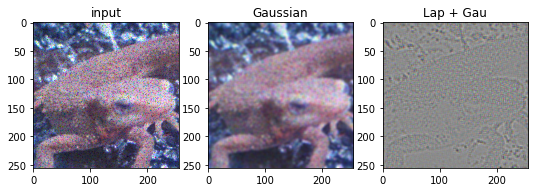

In [46]:
# Laplacian + Gaussian との比較
img_gau = cv2.GaussianBlur(img_noise, (5, 5), 3)
img_lapl = filter_laplacian(img_gau.astype(np.float32))
img_lapl -= img_lapl.min()  # normalize > [0, 1]
img_lapl /= img_lapl.max()

plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1); plt.imshow(img_noise); plt.title('input')
plt.subplot(1, 4, 2); plt.imshow(img_gau); plt.title('Gaussian')
plt.subplot(1, 4, 3); plt.imshow(img_lapl); plt.title('Lap + Gau')
plt.show()

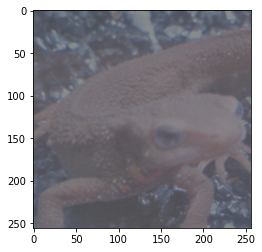

In [47]:
# Q.20. ヒストグラム表示
img_dark = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_dark.png')
plt.imshow(img_dark)
plt.show();

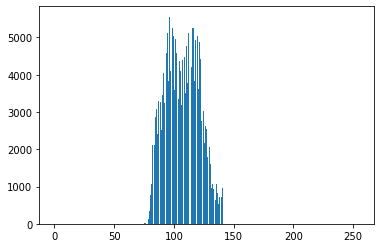

In [51]:
# np.ravel()について
# https://note.nkmk.me/python-numpy-ravel-flatten/
# ravel()は可能な限りビューを返すが、flatten()は常にコピーを返すという違いがある。
# flatten()はメモリを新たに確保する必要があるため、ravel()よりも遅い

plt.hist(img_dark.ravel(), bins=255,  rwidth = 0.8, range=(0, 255))
plt.show();